In [1]:
%matplotlib nbagg
import math
import numpy as np
import matplotlib.pylab as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
nx = 1250          # Number of grid points.
v = 5500.          # Acoustic velocity in m/s.
x_max = 10000      # Length of the domain in m.
eps = 0.9          # CFL
tmax = 1.0         # Simulation time in s
isnap = 2          # Plot the solution each `isnap` timesteps.
sig = 100          # Sigma for the gaussian source time function
x0 = 1000          # Center point of the source time function

In [3]:
fd_type = "upwind"

x = np.linspace(0, x_max, nx)
dx = x[1] - x[0]

dt = eps * dx / v

nt = int(tmax / dt)

sx = np.exp(-1.0 / sig ** 2.0 * (x - x0) ** 2.0);

u = sx
unew = np.zeros(nx)
du = np.zeros(nx)
k1 = np.zeros(nx)
k2 = np.zeros(nx)
q = np.zeros(nx)

<IPython.core.display.Javascript object>


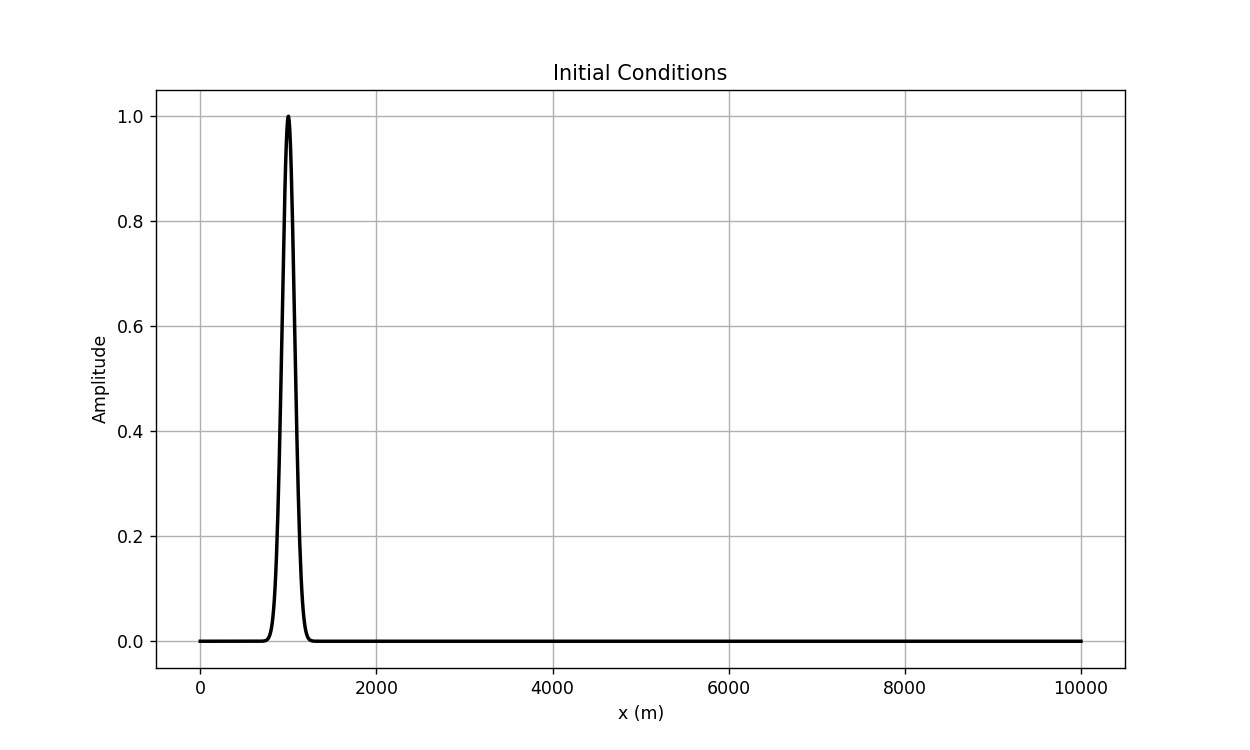

In [4]:
plt.close()
plt.figure(figsize=(10,6))
plt.title("Initial Conditions")
plt.grid()
plt.plot(x, u, color="black", lw=2)
plt.xlabel("x (m)")
plt.ylabel("Amplitude")
plt.show()

<IPython.core.display.Javascript object>


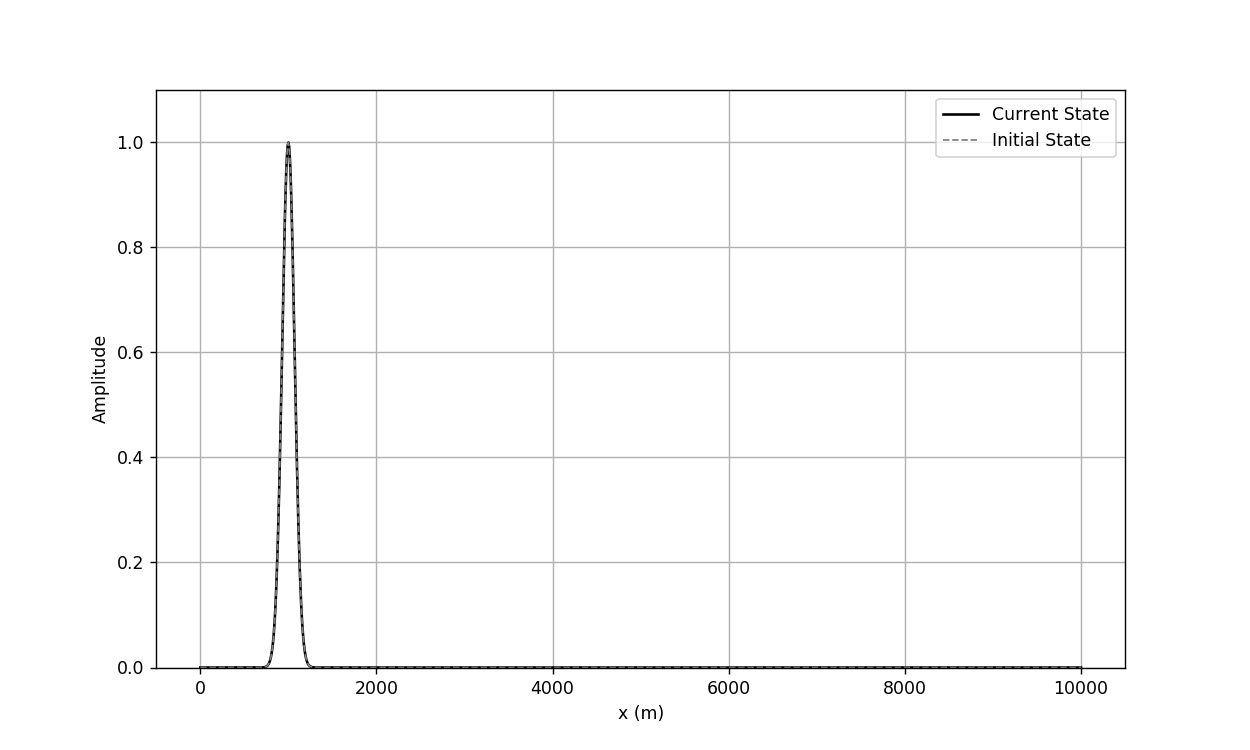

In [5]:
plt.figure(figsize=(10, 6))
lines = plt.plot(x, u, color="black", lw=1.5, label="Current State")
plt.plot(x, u, color="0.5", ls="--", lw=1, label="Initial State")
plt.xlabel("x (m)")
plt.ylabel("Amplitude")
if fd_type == "upwind":
    title = "Upwind finite-difference - Euler scheme"
elif fd_type == "centered":
    title = "Centered finite-difference- Euler scheme"
else:
    raise ValueError("fd_type must be 'forward' or 'centered'")

plt.grid() 
plt.ylim(u.min(), u.max() * 1.1)
plt.legend()
plt.ion()
plt.show()

<IPython.core.display.Javascript object>


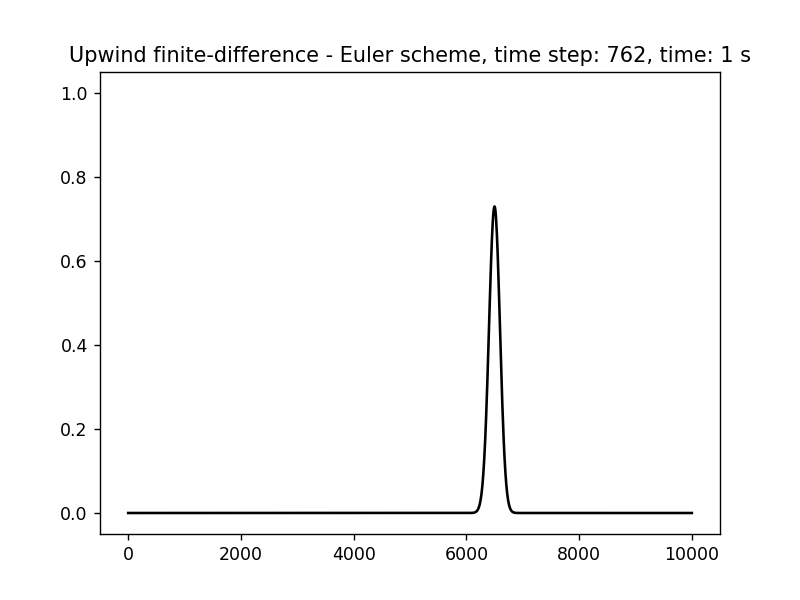

In [6]:
for i in range(nt):
    du[:] = 0.0
    for j in range(1, nx - 1):
        if fd_type == "upwind":
            du[j] = (u[j] - u[j - 1]) / dx
        elif fd_type == "centered":
            du[j] = (u[j + 1] - u[j - 1]) / (2.0 * dx)

 
    unew = u - dt * v * du


    u = unew
    
    if not i % isnap:
        for l in lines:
            l.remove()
            del l
        lines = plt.plot(x, unew, color="black", lw=1.5)        
        plt.title(title + ", time step: %i, time: %.2g s" % (i, i * dt))
        plt.gcf().canvas.draw()        
plt.ioff()

<IPython.core.display.Javascript object>


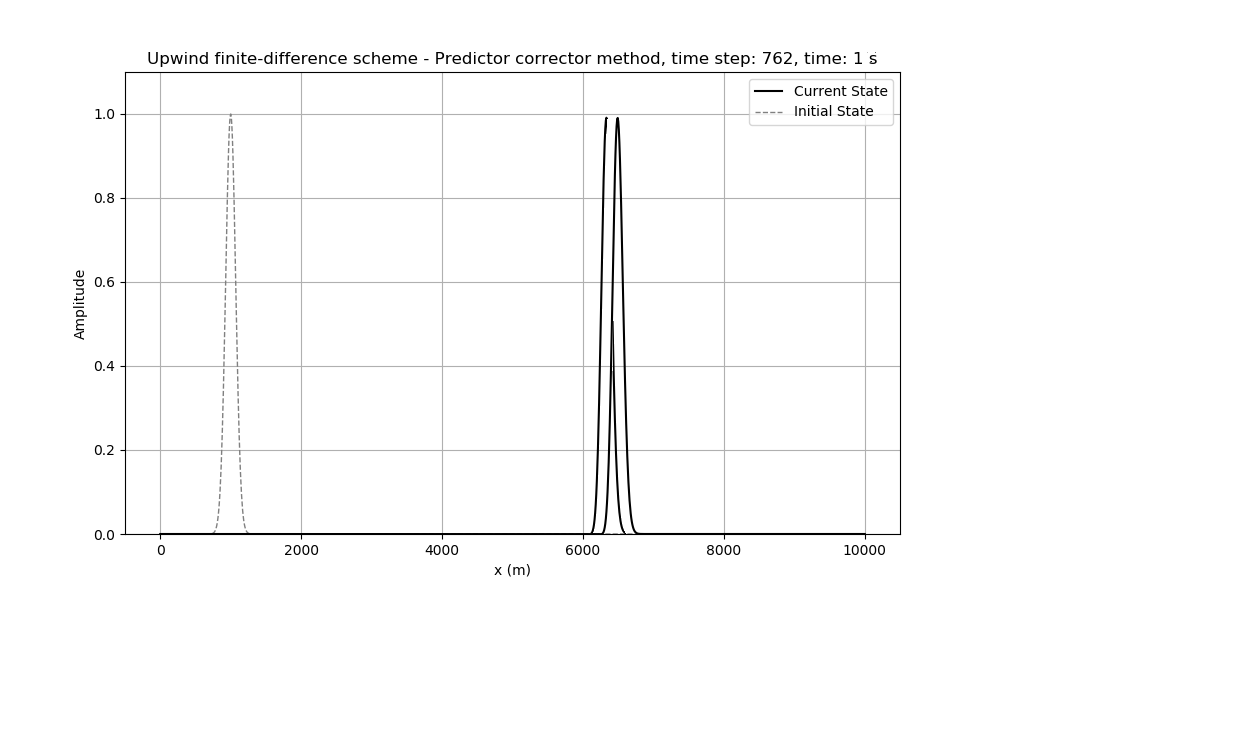

In [7]:
# Advection Equation - Predictor Corrector Scheme

u = sx
unew = np.zeros(nx)
du = np.zeros(nx)
k1 = np.zeros(nx)
k2 = np.zeros(nx)
q = np.zeros(nx)

plt.figure(figsize=(10, 6))
lines = plt.plot(x, u, color="black", lw=1.5, label="Current State")
plt.plot(x, u, color="0.5", ls="--", lw=1, label="Initial State")

plt.xlabel("x (m)")
plt.ylabel("Amplitude")
title = "Upwind finite-difference scheme - Predictor corrector method"

plt.grid() 
plt.ylim(u.min(), u.max() * 1.1)
plt.legend()
plt.ion()
plt.show()

for i in range(nt):
    du[:] = 0.0

    for j in range(1, nx - 1):
            du[j] = (u[j] - u[j - 1]) / dx

    k1 = v * du
    q = u - dt*v*du
    
    unew = q


    for j in range(1, nx - 1):
        du[j]=(q[j+1]-q[j])/dx
    k2 = v*du

    unew = u - 0.5*dt*(k1+k2)

    u = unew

    if not i % isnap:
        for l in lines:
            l.remove()
            del l
        lines = plt.plot(x, unew, color="black", lw=1.5)
        
        plt.title(title + ", time step: %i, time: %.2g s" % (i, i * dt))
        plt.gcf().canvas.draw()    

    
plt.ioff()

<IPython.core.display.Javascript object>


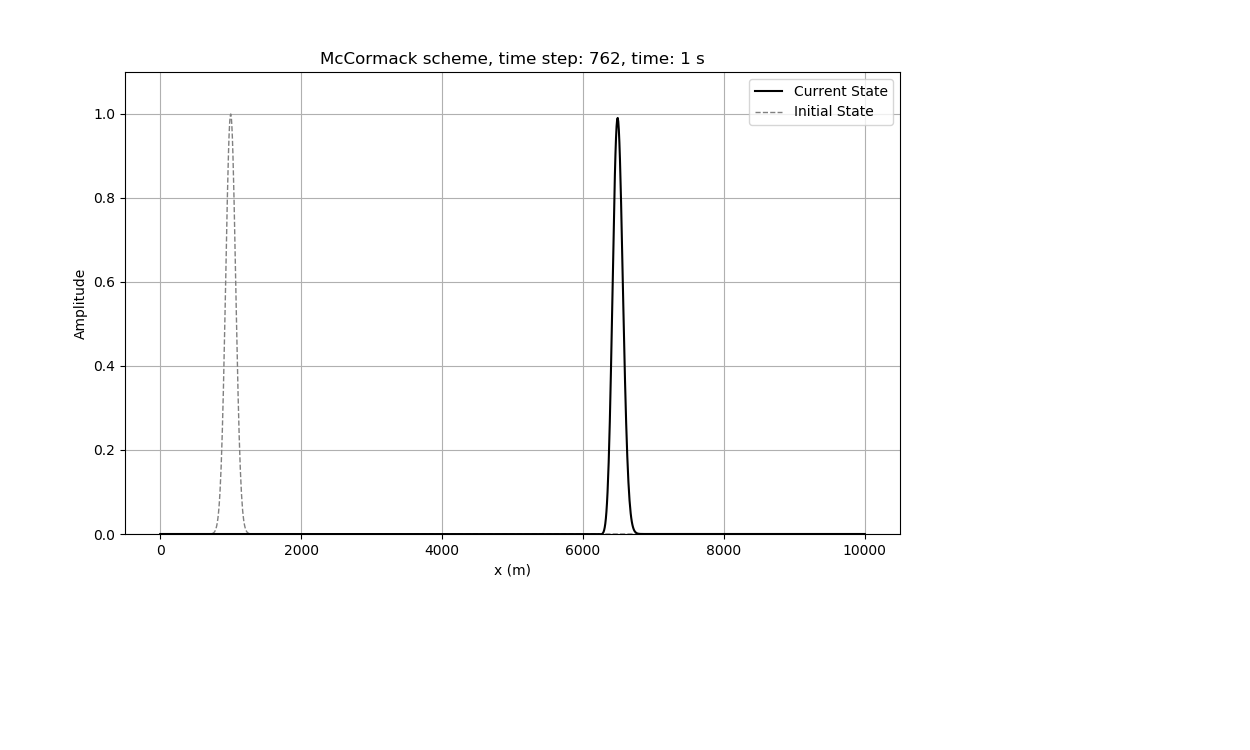

In [8]:
# Advection Equation - McCormack Scheme

u = sx
unew = np.zeros(nx)
du = np.zeros(nx)
k1 = np.zeros(nx)
k2 = np.zeros(nx)
q = np.zeros(nx)

plt.figure(figsize=(10, 6))
lines = plt.plot(x, u, color="black", lw=1.5, label="Current State")
plt.plot(x, u, color="0.5", ls="--", lw=1, label="Initial State")

plt.xlabel("x (m)")
plt.ylabel("Amplitude")
title = "McCormack scheme"

plt.grid() 
plt.ylim(u.min(), u.max() * 1.1)
plt.legend()
plt.ion()
plt.show()

for i in range(nt):
    du[:] = 0.0

    for j in range(1, nx - 1):
            du[j] = (u[j] - u[j - 1]) / dx


    q = u - dt*v*du
    

    for j in range(1, nx - 1):
        du[j]=(q[j+1]-q[j])/dx

    unew = 0.5*(u + q) - v*dt*0.5*du

    u = unew

    if not i % isnap:
        for l in lines:
            l.remove()
            del l
        lines = plt.plot(x, unew, color="black", lw=1.5)
        
        plt.title(title + ", time step: %i, time: %.2g s" % (i, i * dt))
        plt.gcf().canvas.draw()    

    
plt.ioff()

<IPython.core.display.Javascript object>


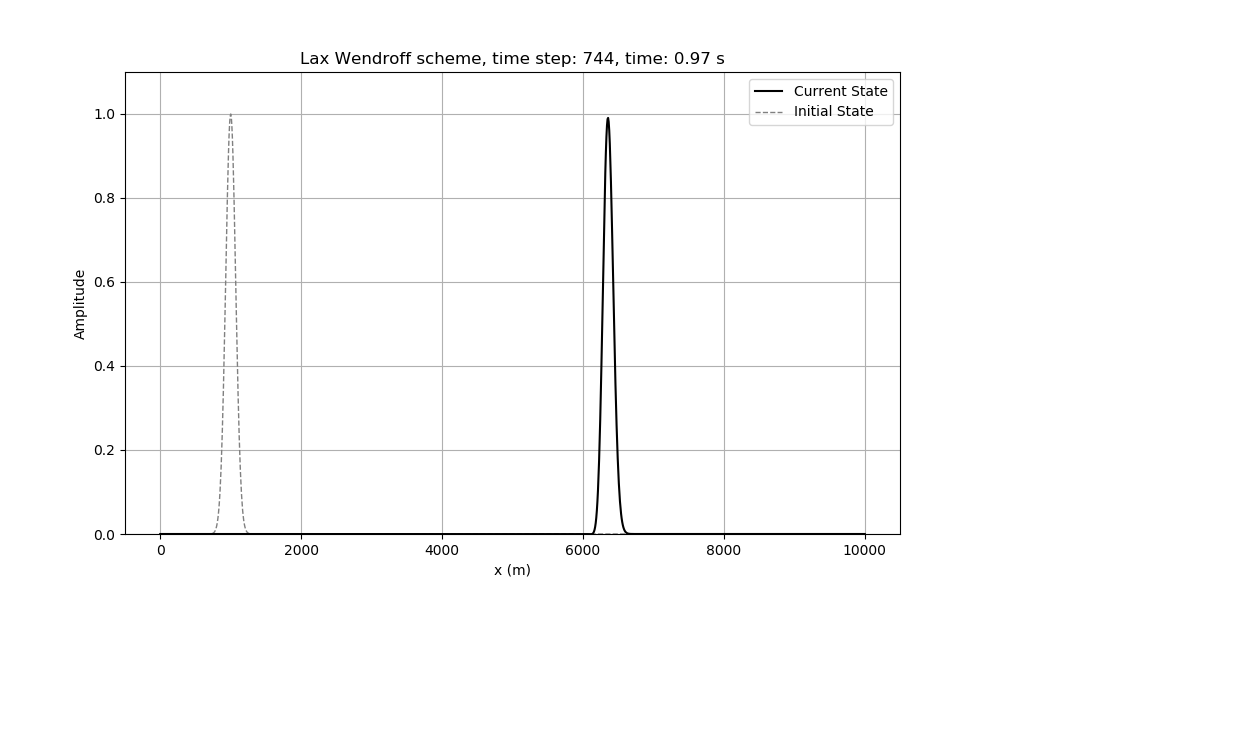

In [ ]:
# Advection Equation - Lax Wendroff Scheme

u = sx
q = np.zeros(nx)
du = np.zeros(nx)

plt.figure(figsize=(10,6))
lines = plt.plot(x, u, color="black", lw=1.5, label="Current State")
plt.plot(x, u, color="0.5", ls="--", lw=1, label="Initial State")
plt.xlabel("x (m)")
plt.ylabel("Amplitude")
title = "Lax Wendroff scheme"
plt.grid() 
plt.ylim(u.min(), u.max() * 1.1)
plt.legend()
plt.ion()
plt.show()

for i in range(1,nt):

    for j in range(1,nx-1):

        du[j] = (u[j + 1] - u[j - 1]) / (2.0 * dx)
        q[j] = dt**2/(2.0*dx**2)*v**2*(u[j+1]-2.*u[j]+u[j-1])

    unew = u - dt * v * du + q
    u = unew

 
    if not i % isnap:
        for l in lines:
            l.remove()
            del l
        lines = plt.plot(x, unew, color="black", lw=1.5)        
        plt.title(title + ", time step: %i, time: %.2g s" % (i, i * dt))
        plt.gcf().canvas.draw()        
plt.ioff()